In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from tqdm import tqdm
import seaborn as sns

# Проверка доступности GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.benchmark = True
print(f"Using device: {device}")

# # Гиперпараметры
# batch_size = 64
# learning_rate = 0.001
# num_epochs = 10

# # Загрузка данных
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1307,), (0.3081,))
# ])

# train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Using device: cuda


In [ ]:
# class FCN(nn.Module):
#     def __init__(self):
#         super(FCN, self).__init__()
#         self.fc1 = nn.Linear(28*28, 512)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256, 128)
#         self.fc4 = nn.Linear(128, 10)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.2)

#     def forward(self, x):
#         x = x.view(-1, 28*28)
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc3(x))
#         x = self.dropout(x)
#         x = self.fc4(x)
#         return x

# def train_model(model, criterion, optimizer, num_epochs=10):
#     train_losses = []
#     test_losses = []
#     train_accs = []
#     test_accs = []

#     start_time = time.time()

#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         correct = 0
#         total = 0

#         for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
#             images, labels = images.to(device), labels.to(device)

#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#         train_loss = running_loss / len(train_loader)
#         train_acc = correct / total
#         train_losses.append(train_loss)
#         train_accs.append(train_acc)

#         # Validation
#         model.eval()
#         test_loss = 0.0
#         correct = 0
#         total = 0

#         with torch.no_grad():
#             for images, labels in test_loader:
#                 images, labels = images.to(device), labels.to(device)
#                 outputs = model(images)
#                 loss = criterion(outputs, labels)
#                 test_loss += loss.item()
#                 _, predicted = torch.max(outputs.data, 1)
#                 total += labels.size(0)
#                 correct += (predicted == labels).sum().item()

#         test_loss = test_loss / len(test_loader)
#         test_acc = correct / total
#         test_losses.append(test_loss)
#         test_accs.append(test_acc)

#         print(f'Epoch {epoch+1}/{num_epochs}: '
#               f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
#               f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

#     training_time = time.time() - start_time

#     # Inference time
#     model.eval()
#     start_time = time.time()
#     with torch.no_grad():
#         for images, _ in test_loader:
#             images = images.to(device)
#             _ = model(images)
#     inference_time = (time.time() - start_time) / len(test_loader)

#     return {
#         'train_losses': train_losses,
#         'test_losses': test_losses,
#         'train_accs': train_accs,
#         'test_accs': test_accs,
#         'training_time': training_time,
#         'inference_time': inference_time
#     }

# # Инициализация и обучение FCN
# fcn = FCN().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(fcn.parameters(), lr=learning_rate)

# fcn_results = train_model(fcn, criterion, optimizer, num_epochs)

Epoch 1/10: 100%|██████████| 938/938 [00:22<00:00, 41.02it/s]


Epoch 1/10: Train Loss: 0.2730, Train Acc: 0.9163, Test Loss: 0.1174, Test Acc: 0.9630


Epoch 2/10: 100%|██████████| 938/938 [00:23<00:00, 39.71it/s]


Epoch 2/10: Train Loss: 0.1278, Train Acc: 0.9625, Test Loss: 0.0993, Test Acc: 0.9700


Epoch 3/10: 100%|██████████| 938/938 [00:23<00:00, 39.56it/s]


Epoch 3/10: Train Loss: 0.1019, Train Acc: 0.9698, Test Loss: 0.0888, Test Acc: 0.9734


Epoch 4/10: 100%|██████████| 938/938 [00:24<00:00, 37.98it/s]


Epoch 4/10: Train Loss: 0.0799, Train Acc: 0.9758, Test Loss: 0.0823, Test Acc: 0.9774


Epoch 5/10: 100%|██████████| 938/938 [00:23<00:00, 40.02it/s]


Epoch 5/10: Train Loss: 0.0728, Train Acc: 0.9787, Test Loss: 0.0956, Test Acc: 0.9734


Epoch 6/10: 100%|██████████| 938/938 [00:23<00:00, 39.50it/s]


Epoch 6/10: Train Loss: 0.0639, Train Acc: 0.9806, Test Loss: 0.0762, Test Acc: 0.9776


Epoch 7/10: 100%|██████████| 938/938 [00:23<00:00, 39.57it/s]


Epoch 7/10: Train Loss: 0.0588, Train Acc: 0.9821, Test Loss: 0.0653, Test Acc: 0.9804


Epoch 8/10: 100%|██████████| 938/938 [00:24<00:00, 39.04it/s]


Epoch 8/10: Train Loss: 0.0560, Train Acc: 0.9838, Test Loss: 0.0669, Test Acc: 0.9822


Epoch 9/10: 100%|██████████| 938/938 [00:24<00:00, 38.73it/s]


Epoch 9/10: Train Loss: 0.0513, Train Acc: 0.9846, Test Loss: 0.0857, Test Acc: 0.9767


Epoch 10/10: 100%|██████████| 938/938 [00:25<00:00, 36.58it/s]


Epoch 10/10: Train Loss: 0.0470, Train Acc: 0.9857, Test Loss: 0.0748, Test Acc: 0.9820


In [ ]:
# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(64*7*7, 128)
#         self.fc2 = nn.Linear(128, 10)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.2)

#     def forward(self, x):
#         x = self.relu(self.conv1(x))
#         x = self.pool(x)
#         x = self.relu(self.conv2(x))
#         x = self.pool(x)
#         x = x.view(-1, 64*7*7)
#         x = self.dropout(x)
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.fc2(x)
#         return x

# # Инициализация и обучение SimpleCNN
# cnn = SimpleCNN().to(device)
# optimizer = optim.Adam(cnn.parameters(), lr=learning_rate)

# cnn_results = train_model(cnn, criterion, optimizer, num_epochs)

Epoch 1/10: 100%|██████████| 938/938 [01:37<00:00,  9.63it/s]


Epoch 1/10: Train Loss: 0.1521, Train Acc: 0.9526, Test Loss: 0.0437, Test Acc: 0.9859


Epoch 2/10: 100%|██████████| 938/938 [01:31<00:00, 10.25it/s]


Epoch 2/10: Train Loss: 0.0559, Train Acc: 0.9832, Test Loss: 0.0328, Test Acc: 0.9894


Epoch 3/10: 100%|██████████| 938/938 [01:31<00:00, 10.23it/s]


Epoch 3/10: Train Loss: 0.0424, Train Acc: 0.9866, Test Loss: 0.0312, Test Acc: 0.9886


Epoch 4/10: 100%|██████████| 938/938 [01:30<00:00, 10.36it/s]


Epoch 4/10: Train Loss: 0.0329, Train Acc: 0.9897, Test Loss: 0.0268, Test Acc: 0.9915


Epoch 5/10: 100%|██████████| 938/938 [01:31<00:00, 10.31it/s]


Epoch 5/10: Train Loss: 0.0278, Train Acc: 0.9909, Test Loss: 0.0278, Test Acc: 0.9917


Epoch 6/10: 100%|██████████| 938/938 [01:31<00:00, 10.20it/s]


Epoch 6/10: Train Loss: 0.0250, Train Acc: 0.9918, Test Loss: 0.0291, Test Acc: 0.9915


Epoch 7/10: 100%|██████████| 938/938 [01:30<00:00, 10.33it/s]


Epoch 7/10: Train Loss: 0.0212, Train Acc: 0.9931, Test Loss: 0.0291, Test Acc: 0.9906


Epoch 8/10: 100%|██████████| 938/938 [01:31<00:00, 10.21it/s]


Epoch 8/10: Train Loss: 0.0197, Train Acc: 0.9935, Test Loss: 0.0237, Test Acc: 0.9923


Epoch 9/10: 100%|██████████| 938/938 [01:32<00:00, 10.15it/s]


Epoch 9/10: Train Loss: 0.0158, Train Acc: 0.9947, Test Loss: 0.0263, Test Acc: 0.9918


Epoch 10/10: 100%|██████████| 938/938 [01:31<00:00, 10.28it/s]


Epoch 10/10: Train Loss: 0.0148, Train Acc: 0.9949, Test Loss: 0.0243, Test Acc: 0.9931


In [ ]:
# class ResidualBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, stride=1):
#         super(ResidualBlock, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(out_channels)
#         self.relu = nn.ReLU(inplace=True)
#         self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(out_channels)

#         self.shortcut = nn.Sequential()
#         if stride != 1 or in_channels != out_channels:
#             self.shortcut = nn.Sequential(
#                 nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
#                 nn.BatchNorm2d(out_channels)
#             )

#     def forward(self, x):
#         residual = x
#         out = self.conv1(x)
#         out = self.bn1(out)
#         out = self.relu(out)
#         out = self.conv2(out)
#         out = self.bn2(out)
#         out += self.shortcut(residual)
#         out = self.relu(out)
#         return out

# class ResCNN(nn.Module):
#     def __init__(self):
#         super(ResCNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(32)
#         self.relu = nn.ReLU(inplace=True)
#         self.layer1 = self._make_layer(32, 32, 1)
#         self.layer2 = self._make_layer(32, 64, 2)
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Добавим global average pooling
#         self.fc = nn.Linear(64, 10)

#     def _make_layer(self, in_channels, out_channels, stride):
#         layers = []
#         layers.append(ResidualBlock(in_channels, out_channels, stride))
#         return nn.Sequential(*layers)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = self.relu(x)
#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.avgpool(x)  # Применяем global average pooling
#         x = x.view(x.size(0), -1)  # Выравниваем для полносвязного слоя
#         x = self.fc(x)
#         return x

# # Инициализация и обучение ResCNN
# rescnn = ResCNN().to(device)
# optimizer = optim.Adam(rescnn.parameters(), lr=learning_rate)

# rescnn_results = train_model(rescnn, criterion, optimizer, num_epochs)

Epoch 1/10: 100%|██████████| 938/938 [05:22<00:00,  2.91it/s]


Epoch 1/10: Train Loss: 0.4128, Train Acc: 0.9160, Test Loss: 0.1693, Test Acc: 0.9476


Epoch 2/10: 100%|██████████| 938/938 [05:31<00:00,  2.83it/s]


Epoch 2/10: Train Loss: 0.0819, Train Acc: 0.9795, Test Loss: 0.0703, Test Acc: 0.9806


Epoch 3/10: 100%|██████████| 938/938 [05:34<00:00,  2.80it/s]


Epoch 3/10: Train Loss: 0.0578, Train Acc: 0.9844, Test Loss: 0.0548, Test Acc: 0.9841


Epoch 4/10: 100%|██████████| 938/938 [05:30<00:00,  2.84it/s]


Epoch 4/10: Train Loss: 0.0462, Train Acc: 0.9869, Test Loss: 0.0901, Test Acc: 0.9724


Epoch 5/10: 100%|██████████| 938/938 [05:29<00:00,  2.85it/s]


Epoch 5/10: Train Loss: 0.0402, Train Acc: 0.9882, Test Loss: 0.0521, Test Acc: 0.9846


Epoch 6/10: 100%|██████████| 938/938 [05:31<00:00,  2.83it/s]


Epoch 6/10: Train Loss: 0.0350, Train Acc: 0.9892, Test Loss: 0.0365, Test Acc: 0.9872


Epoch 7/10: 100%|██████████| 938/938 [05:37<00:00,  2.78it/s]


Epoch 7/10: Train Loss: 0.0319, Train Acc: 0.9902, Test Loss: 0.0427, Test Acc: 0.9862


Epoch 8/10: 100%|██████████| 938/938 [05:33<00:00,  2.81it/s]


Epoch 8/10: Train Loss: 0.0301, Train Acc: 0.9907, Test Loss: 0.0341, Test Acc: 0.9884


Epoch 9/10: 100%|██████████| 938/938 [05:35<00:00,  2.79it/s]


Epoch 9/10: Train Loss: 0.0258, Train Acc: 0.9920, Test Loss: 0.0817, Test Acc: 0.9734


Epoch 10/10: 100%|██████████| 938/938 [05:32<00:00,  2.83it/s]


Epoch 10/10: Train Loss: 0.0235, Train Acc: 0.9928, Test Loss: 0.0480, Test Acc: 0.9834


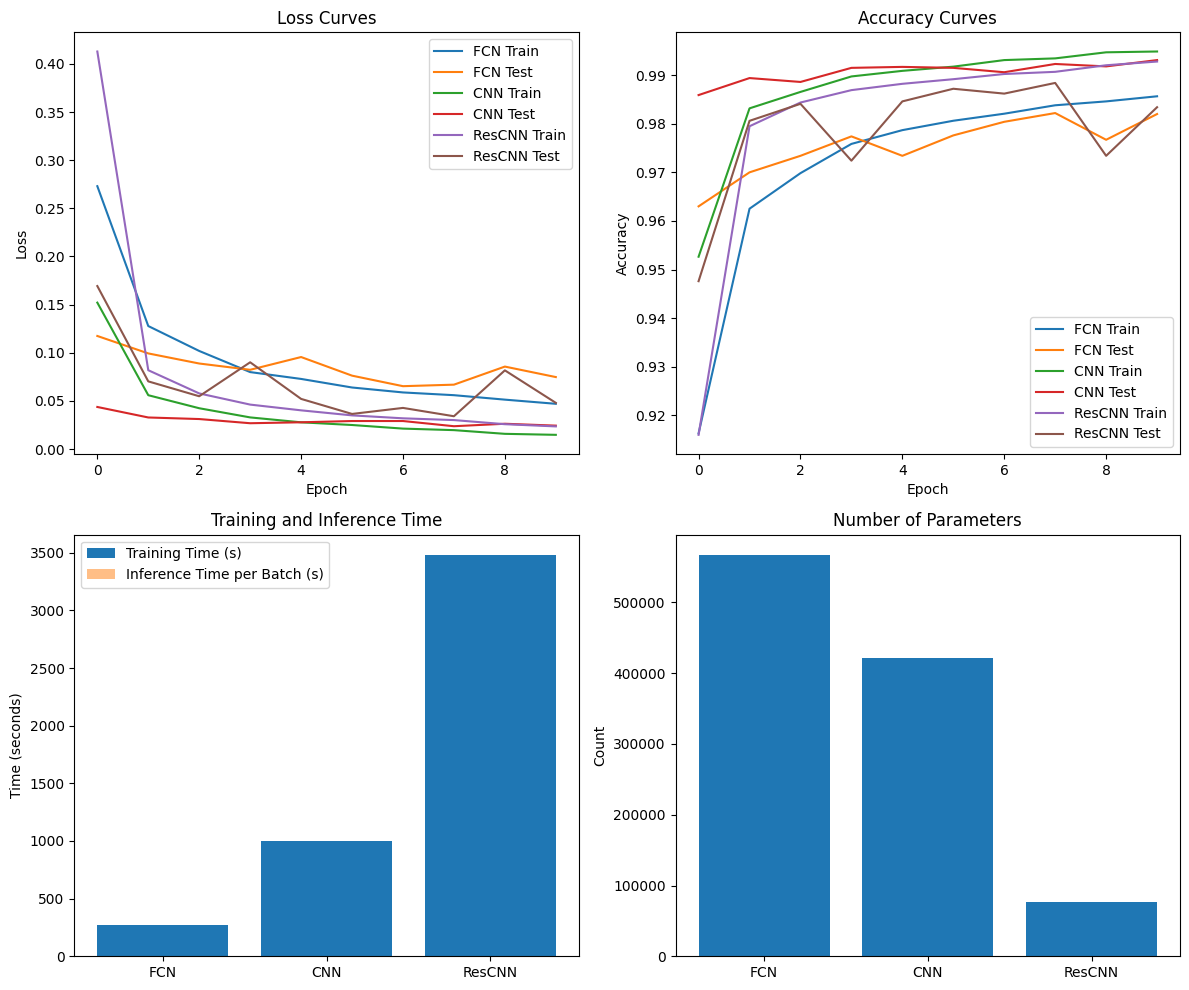

In [ ]:
# def plot_results(fcn_res, cnn_res, rescnn_res):
#     plt.figure(figsize=(12, 10))

#     # Loss curves
#     plt.subplot(2, 2, 1)
#     plt.plot(fcn_res['train_losses'], label='FCN Train')
#     plt.plot(fcn_res['test_losses'], label='FCN Test')
#     plt.plot(cnn_res['train_losses'], label='CNN Train')
#     plt.plot(cnn_res['test_losses'], label='CNN Test')
#     plt.plot(rescnn_res['train_losses'], label='ResCNN Train')
#     plt.plot(rescnn_res['test_losses'], label='ResCNN Test')
#     plt.title('Loss Curves')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()

#     # Accuracy curves
#     plt.subplot(2, 2, 2)
#     plt.plot(fcn_res['train_accs'], label='FCN Train')
#     plt.plot(fcn_res['test_accs'], label='FCN Test')
#     plt.plot(cnn_res['train_accs'], label='CNN Train')
#     plt.plot(cnn_res['test_accs'], label='CNN Test')
#     plt.plot(rescnn_res['train_accs'], label='ResCNN Train')
#     plt.plot(rescnn_res['test_accs'], label='ResCNN Test')
#     plt.title('Accuracy Curves')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     # Training and inference time
#     plt.subplot(2, 2, 3)
#     models = ['FCN', 'CNN', 'ResCNN']
#     training_times = [fcn_res['training_time'], cnn_res['training_time'], rescnn_res['training_time']]
#     inference_times = [fcn_res['inference_time'], cnn_res['inference_time'], rescnn_res['inference_time']]

#     plt.bar(models, training_times, label='Training Time (s)')
#     plt.bar(models, inference_times, label='Inference Time per Batch (s)', alpha=0.5)
#     plt.title('Training and Inference Time')
#     plt.ylabel('Time (seconds)')
#     plt.legend()

#     # Number of parameters
#     plt.subplot(2, 2, 4)
#     fcn_params = sum(p.numel() for p in fcn.parameters())
#     cnn_params = sum(p.numel() for p in cnn.parameters())
#     rescnn_params = sum(p.numel() for p in rescnn.parameters())

#     plt.bar(models, [fcn_params, cnn_params, rescnn_params])
#     plt.title('Number of Parameters')
#     plt.ylabel('Count')

#     plt.tight_layout()
#     plt.show()

# plot_results(fcn_results, cnn_results, rescnn_results)

In [ ]:
# def print_summary(fcn_res, cnn_res, rescnn_res):
#     fcn_params = sum(p.numel() for p in fcn.parameters())
#     cnn_params = sum(p.numel() for p in cnn.parameters())
#     rescnn_params = sum(p.numel() for p in rescnn.parameters())

#     print("\n=== Model Summary ===")
#     print(f"{'Model':<10} | {'Train Acc':<10} | {'Test Acc':<10} | {'Train Time (s)':<15} | {'Inference Time (s/batch)':<20} | {'Params':<10}")
#     print("-" * 90)
#     print(f"{'FCN':<10} | {max(fcn_res['train_accs']):<10.4f} | {max(fcn_res['test_accs']):<10.4f} | {fcn_res['training_time']:<15.2f} | {fcn_res['inference_time']:<20.6f} | {fcn_params:<10}")
#     print(f"{'CNN':<10} | {max(cnn_res['train_accs']):<10.4f} | {max(cnn_res['test_accs']):<10.4f} | {cnn_res['training_time']:<15.2f} | {cnn_res['inference_time']:<20.6f} | {cnn_params:<10}")
#     print(f"{'ResCNN':<10} | {max(rescnn_res['train_accs']):<10.4f} | {max(rescnn_res['test_accs']):<10.4f} | {rescnn_res['training_time']:<15.2f} | {rescnn_res['inference_time']:<20.6f} | {rescnn_params:<10}")

# print_summary(fcn_results, cnn_results, rescnn_results)


=== Model Summary ===
Model      | Train Acc  | Test Acc   | Train Time (s)  | Inference Time (s/batch) | Params    
------------------------------------------------------------------------------------------
FCN        | 0.9857     | 0.9822     | 267.12          | 0.014501             | 567434    
CNN        | 0.9949     | 0.9931     | 996.29          | 0.043196             | 421642    
ResCNN     | 0.9928     | 0.9884     | 3482.67         | 0.098422             | 77290     


# 1.2 Сравнение на CIFAR-10

In [3]:
# Гиперпараметры
batch_size = 256
learning_rate = 0.001
num_epochs = 10


# Аугментация данных и нормализация для CIFAR-10
transform_train_CIFAR = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

transform_test_CIFAR = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Загрузка данных
train_dataset_CIFAR = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train_CIFAR)
test_dataset_CIFAR = datasets.CIFAR10(root='./data', train=False, transform=transform_test_CIFAR)

train_loader_CIFAR = DataLoader(train_dataset_CIFAR, batch_size=batch_size, shuffle=True)
test_loader_CIFAR = DataLoader(test_dataset_CIFAR, batch_size=batch_size, shuffle=False)

# Классы CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:03<00:00, 48.4MB/s]


In [3]:
class DeepFCN(nn.Module):
    def __init__(self, input_size=32*32*3, hidden_size=1024, num_classes=10, dropout=0.5):
        super(DeepFCN, self).__init__()
        # Полносвязные слои
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)
        self.fc3 = nn.Linear(hidden_size//2, hidden_size//4)
        self.fc4 = nn.Linear(hidden_size//4, hidden_size//8)
        self.fc5 = nn.Linear(hidden_size//8, num_classes)

        # Активация и регуляризация
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Выравнивание входа (B, C, H, W) -> (B, C*H*W)
        x = x.view(x.size(0), -1)

        # Проверка размера (можно убрать после отладки)
        if x.size(1) != 32*32*3:
            raise ValueError(f"Ожидается размер входа 3072 (32x32x3), получен {x.size(1)}")

        # Прямой проход
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.dropout(self.relu(self.fc4(x)))
        x = self.fc5(x)
        return x

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(residual)
        out = self.relu(out)
        return out

class ResCNN_CIFAR(nn.Module):
    def __init__(self):
        super(ResCNN_CIFAR, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(64, 2, stride=1)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, 10)

    def _make_layer(self, out_channels, blocks, stride):
        layers = []
        layers.append(ResidualBlock(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [ ]:
class RegularizedResCNN(nn.Module):
    def __init__(self):
        super(RegularizedResCNN, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(64, 2, stride=1)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.5)  # Добавляем dropout
        self.fc = nn.Linear(256, 10)

    def _make_layer(self, out_channels, blocks, stride):
        layers = []
        layers.append(ResidualBlock(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)  # Применяем dropout перед FC
        x = self.fc(x)
        return x

In [ ]:
def train_model_CIFAR(model, criterion, optimizer, num_epochs=20):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader_CIFAR, desc=f'Epoch {epoch+1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader_CIFAR)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validation
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in train_loader_CIFAR:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_loss = test_loss / len(train_loader_CIFAR)
        test_acc = correct / total
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        print(f'Epoch {epoch+1}/{num_epochs}: '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

    training_time = time.time() - start_time

    # Inference time
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        for images, _ in train_loader_CIFAR:
            images = images.to(device)
            _ = model(images)
    inference_time = (time.time() - start_time) / len(train_loader_CIFAR)

    # Confusion matrix
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in train_loader_CIFAR:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    # Gradient flow analysis
    grad_flow = []
    for name, param in model.named_parameters():
        if param.grad is not None:
            grad_mean = param.grad.abs().mean().item()
            grad_flow.append((name, grad_mean))

    return {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accs': train_accs,
        'test_accs': test_accs,
        'training_time': training_time,
        'inference_time': inference_time,
        'confusion_matrix': cm,
        'gradient_flow': grad_flow
    }

def plot_results(results_dict):
    models = list(results_dict.keys())

    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    for model in models:
        plt.plot(results_dict[model]['train_accs'], '--', label=f'{model} Train')
        plt.plot(results_dict[model]['test_accs'], '-', label=f'{model} Test')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    for model in models:
        plt.plot(results_dict[model]['train_losses'], '--', label=f'{model} Train')
        plt.plot(results_dict[model]['test_losses'], '-', label=f'{model} Test')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion matrices
    plt.figure(figsize=(18, 5))
    for i, model in enumerate(models):
        plt.subplot(1, 3, i+1)
        sns.heatmap(results_dict[model]['confusion_matrix'], annot=True, fmt='d',
                   cmap='Blues', xticklabels=classes, yticklabels=classes)
        plt.title(f'{model} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # Gradient flow
    plt.figure(figsize=(12, 8))
    for i, model in enumerate(models):
        layers = [x[0] for x in results_dict[model]['gradient_flow']]
        grads = [x[1] for x in results_dict[model]['gradient_flow']]
        plt.plot(grads, 'o-', label=model)
    plt.yscale('log')
    plt.title('Gradient Flow')
    plt.xlabel('Layer')
    plt.ylabel('Mean Gradient (log scale)')
    plt.legend()
    plt.show()

In [ ]:
# Инициализация моделей
fcn = DeepFCN().to(device)
rescnn = ResCNN_CIFAR().to(device)
reg_rescnn = RegularizedResCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer_fcn = optim.Adam(fcn.parameters(), lr=learning_rate)
optimizer_rescnn = optim.Adam(rescnn.parameters(), lr=learning_rate)
optimizer_reg_rescnn = optim.Adam(reg_rescnn.parameters(), lr=learning_rate)

print("Training DeepFCN...")
fcn_results = train_model_CIFAR(fcn, criterion, optimizer_fcn, num_epochs)

Training DeepFCN...


Epoch 1/10: 100%|██████████| 196/196 [00:20<00:00,  9.39it/s]


Epoch 1/10: Train Loss: 2.0812, Train Acc: 0.2234, Test Loss: 1.8924, Test Acc: 0.3158


Epoch 2/10: 100%|██████████| 196/196 [00:18<00:00, 10.42it/s]


Epoch 2/10: Train Loss: 1.9421, Train Acc: 0.2843, Test Loss: 1.8259, Test Acc: 0.3403


Epoch 3/10: 100%|██████████| 196/196 [00:18<00:00, 10.34it/s]


Epoch 3/10: Train Loss: 1.9023, Train Acc: 0.3050, Test Loss: 1.8009, Test Acc: 0.3609


Epoch 4/10: 100%|██████████| 196/196 [00:18<00:00, 10.35it/s]


Epoch 4/10: Train Loss: 1.8659, Train Acc: 0.3197, Test Loss: 1.7424, Test Acc: 0.3783


Epoch 5/10: 100%|██████████| 196/196 [00:18<00:00, 10.34it/s]


Epoch 5/10: Train Loss: 1.8457, Train Acc: 0.3316, Test Loss: 1.7405, Test Acc: 0.3763


Epoch 6/10: 100%|██████████| 196/196 [00:19<00:00, 10.28it/s]


Epoch 6/10: Train Loss: 1.8238, Train Acc: 0.3440, Test Loss: 1.7055, Test Acc: 0.4022


Epoch 7/10: 100%|██████████| 196/196 [00:18<00:00, 10.43it/s]


Epoch 7/10: Train Loss: 1.8058, Train Acc: 0.3515, Test Loss: 1.7139, Test Acc: 0.4045


Epoch 8/10: 100%|██████████| 196/196 [00:18<00:00, 10.45it/s]


Epoch 8/10: Train Loss: 1.7942, Train Acc: 0.3562, Test Loss: 1.6851, Test Acc: 0.4059


Epoch 9/10: 100%|██████████| 196/196 [00:18<00:00, 10.42it/s]


Epoch 9/10: Train Loss: 1.7803, Train Acc: 0.3627, Test Loss: 1.6584, Test Acc: 0.4180


Epoch 10/10: 100%|██████████| 196/196 [00:19<00:00, 10.16it/s]


Epoch 10/10: Train Loss: 1.7694, Train Acc: 0.3632, Test Loss: 1.6413, Test Acc: 0.4218


In [ ]:
print("\nTraining ResCNN...")
rescnn_results = train_model_CIFAR(rescnn, criterion, optimizer_rescnn, num_epochs)


Training ResCNN...


Epoch 1/10: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


Epoch 1/10: Train Loss: 1.4124, Train Acc: 0.4805, Test Loss: 1.3845, Test Acc: 0.5334


Epoch 2/10: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


Epoch 2/10: Train Loss: 0.9551, Train Acc: 0.6592, Test Loss: 0.9657, Test Acc: 0.6627


Epoch 3/10: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


Epoch 3/10: Train Loss: 0.7724, Train Acc: 0.7265, Test Loss: 0.9039, Test Acc: 0.6921


Epoch 4/10: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


Epoch 4/10: Train Loss: 0.6395, Train Acc: 0.7775, Test Loss: 0.7750, Test Acc: 0.7437


Epoch 5/10: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


Epoch 5/10: Train Loss: 0.5555, Train Acc: 0.8086, Test Loss: 0.5638, Test Acc: 0.8024


Epoch 6/10: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


Epoch 6/10: Train Loss: 0.4951, Train Acc: 0.8280, Test Loss: 0.5406, Test Acc: 0.8111


Epoch 7/10: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


Epoch 7/10: Train Loss: 0.4473, Train Acc: 0.8453, Test Loss: 0.5457, Test Acc: 0.8108


Epoch 8/10: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


Epoch 8/10: Train Loss: 0.4103, Train Acc: 0.8586, Test Loss: 0.5574, Test Acc: 0.8119


Epoch 9/10: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


Epoch 9/10: Train Loss: 0.3788, Train Acc: 0.8680, Test Loss: 0.4535, Test Acc: 0.8431


Epoch 10/10: 100%|██████████| 196/196 [00:47<00:00,  4.16it/s]


Epoch 10/10: Train Loss: 0.3492, Train Acc: 0.8785, Test Loss: 0.5075, Test Acc: 0.8240


In [ ]:
print("\nTraining RegularizedResCNN...")
reg_rescnn_results = train_model_CIFAR(reg_rescnn, criterion, optimizer_reg_rescnn, num_epochs)


Training RegularizedResCNN...


Epoch 1/10: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


Epoch 1/10: Train Loss: 1.5060, Train Acc: 0.4458, Test Loss: 1.2660, Test Acc: 0.5393


Epoch 2/10: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


Epoch 2/10: Train Loss: 1.0401, Train Acc: 0.6281, Test Loss: 0.9819, Test Acc: 0.6438


Epoch 3/10: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


Epoch 3/10: Train Loss: 0.8494, Train Acc: 0.7011, Test Loss: 0.8323, Test Acc: 0.7034


Epoch 4/10: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


Epoch 4/10: Train Loss: 0.7149, Train Acc: 0.7523, Test Loss: 0.6838, Test Acc: 0.7591


Epoch 5/10: 100%|██████████| 196/196 [00:46<00:00,  4.25it/s]


Epoch 5/10: Train Loss: 0.6183, Train Acc: 0.7871, Test Loss: 0.6175, Test Acc: 0.7842


Epoch 6/10: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


Epoch 6/10: Train Loss: 0.5498, Train Acc: 0.8118, Test Loss: 0.5581, Test Acc: 0.8063


Epoch 7/10: 100%|██████████| 196/196 [00:46<00:00,  4.24it/s]


Epoch 7/10: Train Loss: 0.4936, Train Acc: 0.8315, Test Loss: 0.5377, Test Acc: 0.8117


Epoch 8/10: 100%|██████████| 196/196 [00:46<00:00,  4.25it/s]


Epoch 8/10: Train Loss: 0.4548, Train Acc: 0.8459, Test Loss: 0.4135, Test Acc: 0.8548


Epoch 9/10: 100%|██████████| 196/196 [00:45<00:00,  4.28it/s]


Epoch 9/10: Train Loss: 0.4121, Train Acc: 0.8589, Test Loss: 0.4335, Test Acc: 0.8489


Epoch 10/10: 100%|██████████| 196/196 [00:45<00:00,  4.30it/s]


Epoch 10/10: Train Loss: 0.3840, Train Acc: 0.8689, Test Loss: 0.4065, Test Acc: 0.8617


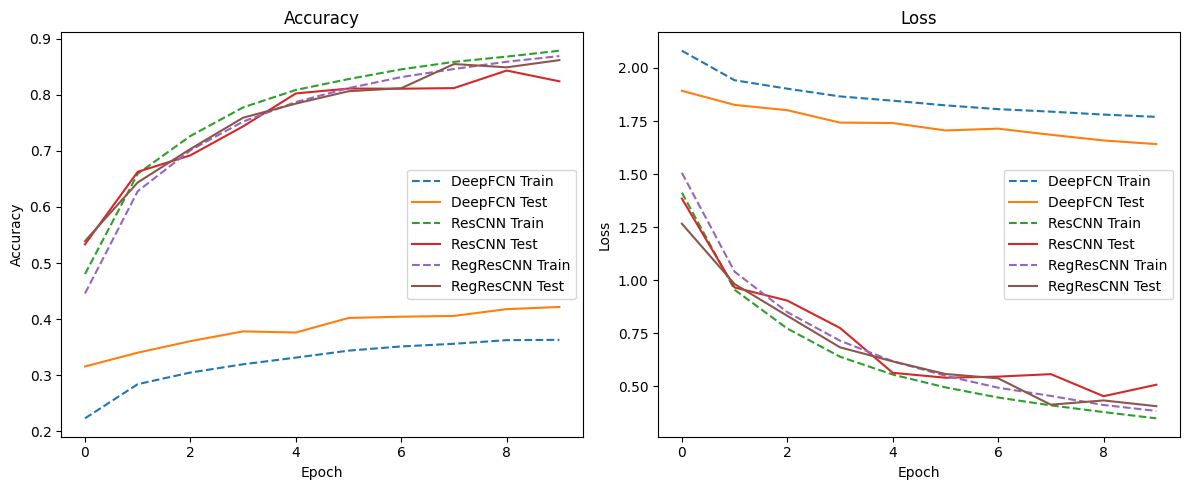

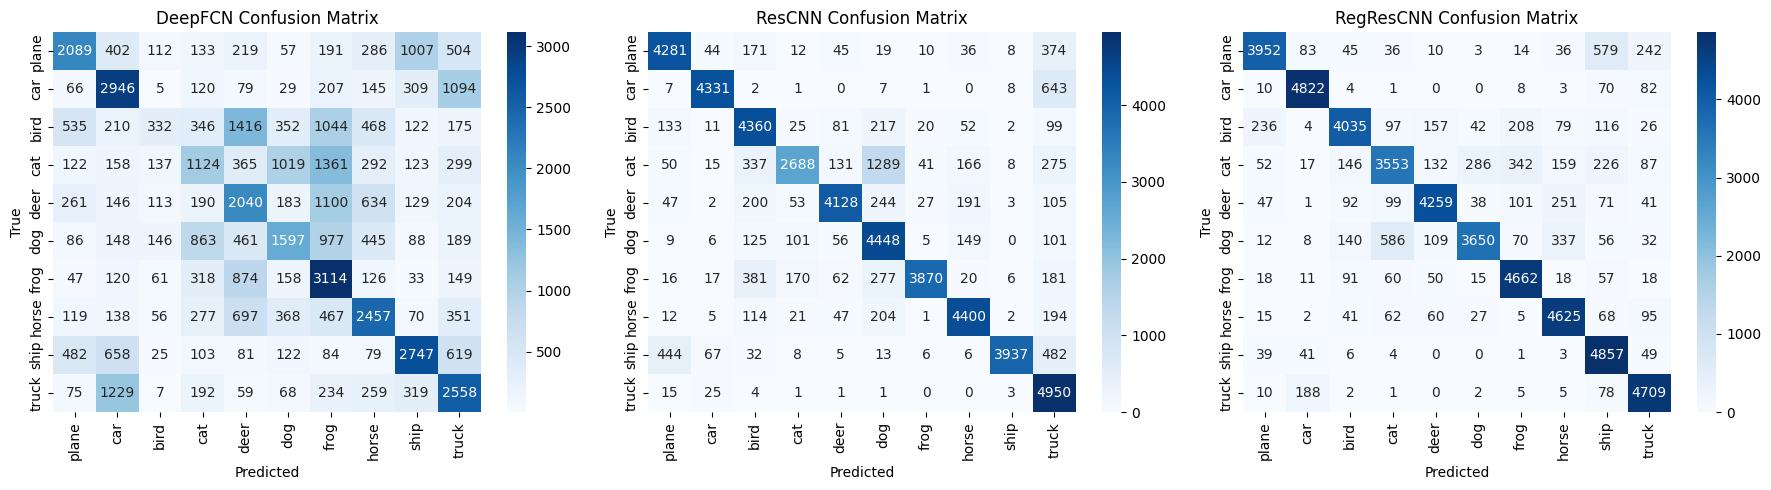

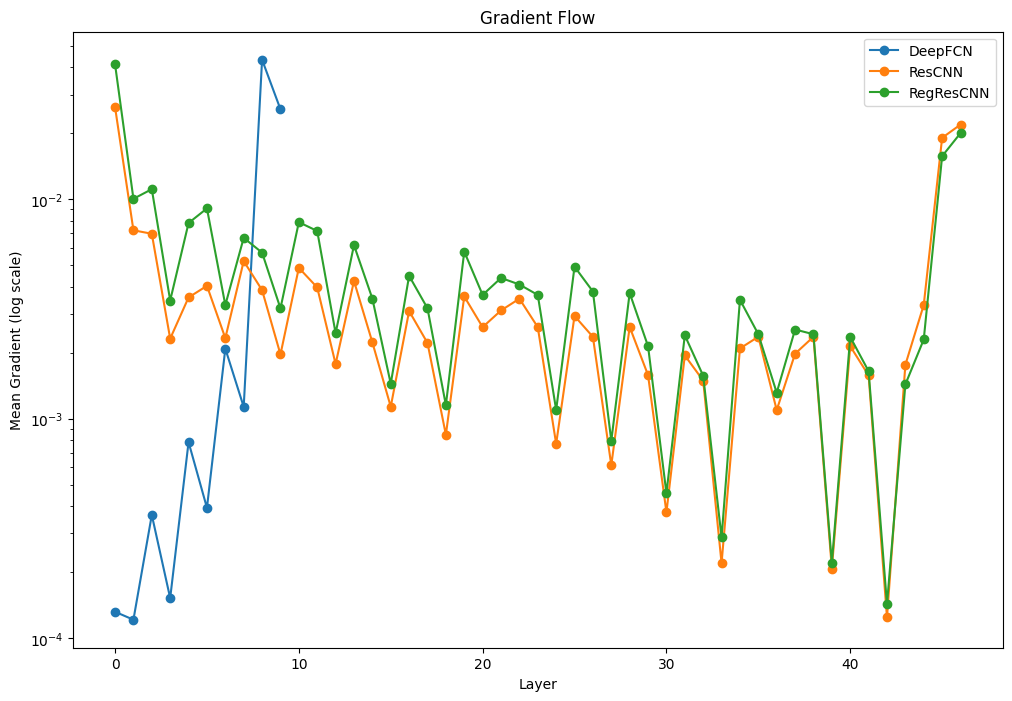

In [ ]:
# Собираем результаты
all_results = {
    'DeepFCN': fcn_results,
    'ResCNN': rescnn_results,
    'RegResCNN': reg_rescnn_results
}

# Визуализация
plot_results(all_results)

In [ ]:
models = {
    'DeepFCN': DeepFCN(),
    'ResCNN': ResCNN_CIFAR(),
    'RegResCNN': RegularizedResCNN()
}

def print_summary(results_dict, model_dict):
    """
    Печатает сводную таблицу результатов

    Параметры:
    results_dict - словарь с результатами обучения
    model_dict - словарь с экземплярами моделей
    """
    print("\n=== Model Summary ===")
    print(f"{'Model':<15} | {'Train Acc':<10} | {'Test Acc':<10} | {'Time (s)':<10} | {'Params':<12} | {'Overfitting':<10}")
    print("-" * 80)

    for model_name in results_dict:
        res = results_dict[model_name]
        model = model_dict[model_name]  # Получаем модель из словаря

        train_acc = max(res['train_accs'])
        test_acc = max(res['test_accs'])
        overfitting = train_acc - test_acc
        params = sum(p.numel() for p in model.parameters())

        print(f"{model_name:<15} | {train_acc:.2f}%     | {test_acc:.2f}%     | {res['training_time']:.1f}      | {params:,}     | {overfitting:.2f}%")

print_summary(all_results, models)


=== Model Summary ===
Model           | Train Acc  | Test Acc   | Time (s)   | Params       | Overfitting
--------------------------------------------------------------------------------
DeepFCN         | 0.36%     | 0.42%     | 365.3      | 3,837,066     | -0.06%
ResCNN          | 0.88%     | 0.84%     | 732.6      | 2,777,674     | 0.04%
RegResCNN       | 0.87%     | 0.86%     | 715.7      | 2,777,674     | 0.01%


# Задание 2: Анализ архитектур

## 2.1 Влияние размера ядра свертки


```
# Исследуйте влияние размера ядра свертки:
# - 3x3 ядра
# - 5x5 ядра
# - 7x7 ядра
# - Комбинация разных размеров (1x1 + 3x3)
#
# Для каждого варианта:
# - Поддерживайте одинаковое количество параметров
# - Сравните точность и время обучения
# - Проанализируйте рецептивные поля
# - Визуализируйте активации первого слоя
```



In [ ]:
class ConvNet3x3(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.classifier = nn.Linear(256*8*8, 10)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

class ConvNet5x5(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, padding=2),  # Меньше каналов для сохранения параметров
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=5, padding=2, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=5, padding=2, stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.classifier = nn.Linear(128*8*8, 10)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

class ConvNetMixed(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.classifier = nn.Linear(256*8*8, 10)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [9]:
def train_and_evaluate(model, name):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Тренировка
    train_losses, test_losses = [], []
    train_accs, test_accs = [], []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in tqdm(train_loader_CIFAR, desc=f'{name} Epoch {epoch+1}'):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        # Валидация
        model.eval()
        test_loss, test_correct, test_total = 0.0, 0, 0

        with torch.no_grad():
            for inputs, labels in test_loader_CIFAR:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                test_total += labels.size(0)
                test_correct += predicted.eq(labels).sum().item()

        # Сохранение метрик
        train_loss = running_loss / len(train_loader_CIFAR)
        test_loss_val = test_loss / len(test_loader_CIFAR)
        train_acc = 100. * correct / total
        test_acc = 100. * test_correct / test_total

        train_losses.append(train_loss)
        test_losses.append(test_loss_val)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss_val:.4f} | '
              f'Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')

    training_time = time.time() - start_time

    return {
        'name': name,
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accs': train_accs,
        'test_accs': test_accs,
        'time': training_time,
        'params': sum(p.numel() for p in model.parameters())
    }

In [ ]:
models = {
    '3x3 kernels': ConvNet3x3(),
    '5x5 kernels': ConvNet5x5(),
    'Mixed 1x1+3x3': ConvNetMixed()
}

results = []
for name, model in models.items():
    print(f"\n=== Training {name} ===")
    result = train_and_evaluate(model, name)
    results.append(result)


=== Training 3x3 kernels ===


3x3 kernels Epoch 1: 100%|██████████| 196/196 [00:31<00:00,  6.32it/s]


Epoch 1: Train Loss: 1.7926, Test Loss: 1.3302 | Train Acc: 40.60%, Test Acc: 52.63%


3x3 kernels Epoch 2: 100%|██████████| 196/196 [00:28<00:00,  6.93it/s]


Epoch 2: Train Loss: 1.2587, Test Loss: 1.0945 | Train Acc: 55.10%, Test Acc: 60.84%


3x3 kernels Epoch 3: 100%|██████████| 196/196 [00:27<00:00,  7.21it/s]


Epoch 3: Train Loss: 1.0920, Test Loss: 1.0836 | Train Acc: 61.55%, Test Acc: 62.21%


3x3 kernels Epoch 4: 100%|██████████| 196/196 [00:27<00:00,  7.11it/s]


Epoch 4: Train Loss: 1.0128, Test Loss: 1.0893 | Train Acc: 64.43%, Test Acc: 63.71%


3x3 kernels Epoch 5: 100%|██████████| 196/196 [00:27<00:00,  7.24it/s]


Epoch 5: Train Loss: 0.9478, Test Loss: 0.8884 | Train Acc: 66.82%, Test Acc: 70.10%


3x3 kernels Epoch 6: 100%|██████████| 196/196 [00:26<00:00,  7.40it/s]


Epoch 6: Train Loss: 0.8845, Test Loss: 0.8410 | Train Acc: 69.19%, Test Acc: 70.76%


3x3 kernels Epoch 7: 100%|██████████| 196/196 [00:25<00:00,  7.60it/s]


Epoch 7: Train Loss: 0.8540, Test Loss: 0.7901 | Train Acc: 70.25%, Test Acc: 72.98%


3x3 kernels Epoch 8: 100%|██████████| 196/196 [00:25<00:00,  7.60it/s]


Epoch 8: Train Loss: 0.8055, Test Loss: 0.7510 | Train Acc: 72.19%, Test Acc: 74.24%


3x3 kernels Epoch 9: 100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


Epoch 9: Train Loss: 0.7817, Test Loss: 0.7919 | Train Acc: 72.80%, Test Acc: 72.50%


3x3 kernels Epoch 10: 100%|██████████| 196/196 [00:25<00:00,  7.58it/s]


Epoch 10: Train Loss: 0.7624, Test Loss: 0.7019 | Train Acc: 73.40%, Test Acc: 75.39%

=== Training 5x5 kernels ===


5x5 kernels Epoch 1: 100%|██████████| 196/196 [00:26<00:00,  7.43it/s]


Epoch 1: Train Loss: 1.5901, Test Loss: 1.3649 | Train Acc: 42.94%, Test Acc: 50.44%


5x5 kernels Epoch 2: 100%|██████████| 196/196 [00:25<00:00,  7.75it/s]


Epoch 2: Train Loss: 1.2059, Test Loss: 1.0198 | Train Acc: 57.28%, Test Acc: 63.71%


5x5 kernels Epoch 3: 100%|██████████| 196/196 [00:25<00:00,  7.76it/s]


Epoch 3: Train Loss: 1.0286, Test Loss: 0.9452 | Train Acc: 63.62%, Test Acc: 67.76%


5x5 kernels Epoch 4: 100%|██████████| 196/196 [00:25<00:00,  7.80it/s]


Epoch 4: Train Loss: 0.9331, Test Loss: 0.8720 | Train Acc: 67.26%, Test Acc: 70.21%


5x5 kernels Epoch 5: 100%|██████████| 196/196 [00:25<00:00,  7.82it/s]


Epoch 5: Train Loss: 0.8645, Test Loss: 0.9300 | Train Acc: 69.77%, Test Acc: 69.27%


5x5 kernels Epoch 6: 100%|██████████| 196/196 [00:25<00:00,  7.75it/s]


Epoch 6: Train Loss: 0.8238, Test Loss: 0.8180 | Train Acc: 71.45%, Test Acc: 72.05%


5x5 kernels Epoch 7: 100%|██████████| 196/196 [00:24<00:00,  7.95it/s]


Epoch 7: Train Loss: 0.7859, Test Loss: 0.7313 | Train Acc: 72.68%, Test Acc: 75.25%


5x5 kernels Epoch 8: 100%|██████████| 196/196 [00:23<00:00,  8.23it/s]


Epoch 8: Train Loss: 0.7461, Test Loss: 0.7547 | Train Acc: 74.07%, Test Acc: 74.15%


5x5 kernels Epoch 9: 100%|██████████| 196/196 [00:24<00:00,  7.90it/s]


Epoch 9: Train Loss: 0.7109, Test Loss: 0.6973 | Train Acc: 75.41%, Test Acc: 76.21%


5x5 kernels Epoch 10: 100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


Epoch 10: Train Loss: 0.6848, Test Loss: 0.6932 | Train Acc: 76.30%, Test Acc: 75.76%

=== Training Mixed 1x1+3x3 ===


Mixed 1x1+3x3 Epoch 1: 100%|██████████| 196/196 [00:29<00:00,  6.67it/s]


Epoch 1: Train Loss: 1.8271, Test Loss: 1.4226 | Train Acc: 37.44%, Test Acc: 48.58%


Mixed 1x1+3x3 Epoch 2: 100%|██████████| 196/196 [00:29<00:00,  6.57it/s]


Epoch 2: Train Loss: 1.3998, Test Loss: 1.2588 | Train Acc: 49.00%, Test Acc: 54.16%


Mixed 1x1+3x3 Epoch 3: 100%|██████████| 196/196 [00:29<00:00,  6.61it/s]


Epoch 3: Train Loss: 1.2657, Test Loss: 1.1183 | Train Acc: 54.83%, Test Acc: 60.10%


Mixed 1x1+3x3 Epoch 4: 100%|██████████| 196/196 [00:29<00:00,  6.70it/s]


Epoch 4: Train Loss: 1.1433, Test Loss: 1.0276 | Train Acc: 59.37%, Test Acc: 64.28%


Mixed 1x1+3x3 Epoch 5: 100%|██████████| 196/196 [00:29<00:00,  6.65it/s]


Epoch 5: Train Loss: 1.0538, Test Loss: 0.9797 | Train Acc: 62.79%, Test Acc: 66.06%


Mixed 1x1+3x3 Epoch 6: 100%|██████████| 196/196 [00:29<00:00,  6.75it/s]


Epoch 6: Train Loss: 0.9905, Test Loss: 0.8920 | Train Acc: 65.00%, Test Acc: 67.91%


Mixed 1x1+3x3 Epoch 7: 100%|██████████| 196/196 [00:29<00:00,  6.70it/s]


Epoch 7: Train Loss: 0.9181, Test Loss: 0.8615 | Train Acc: 67.87%, Test Acc: 69.41%


Mixed 1x1+3x3 Epoch 8: 100%|██████████| 196/196 [00:29<00:00,  6.59it/s]


Epoch 8: Train Loss: 0.8748, Test Loss: 0.8203 | Train Acc: 69.48%, Test Acc: 71.95%


Mixed 1x1+3x3 Epoch 9: 100%|██████████| 196/196 [00:28<00:00,  6.77it/s]


Epoch 9: Train Loss: 0.8327, Test Loss: 0.8317 | Train Acc: 71.13%, Test Acc: 71.55%


Mixed 1x1+3x3 Epoch 10: 100%|██████████| 196/196 [00:29<00:00,  6.57it/s]


Epoch 10: Train Loss: 0.8014, Test Loss: 0.7520 | Train Acc: 72.14%, Test Acc: 73.81%


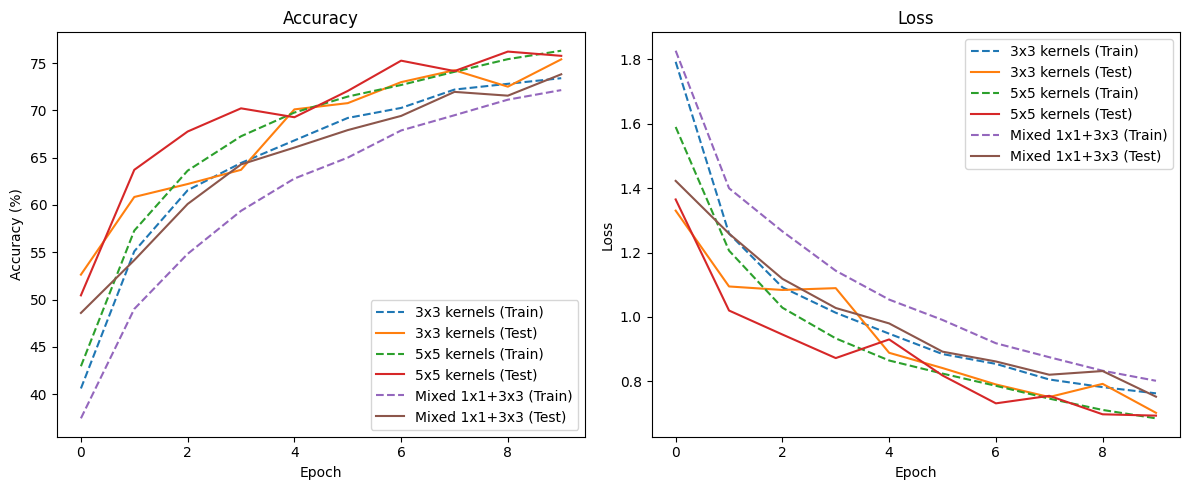


=== Model Comparison ===
Model           | Params     | Time (s) | Best Test Acc
--------------------------------------------------
3x3 kernels     | 535,562    | 296.7      | 75.39%
5x5 kernels     | 341,002    | 277.1      | 76.21%
Mixed 1x1+3x3   | 571,082    | 324.4      | 73.81%


In [ ]:
# Графики точности
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for res in results:
    plt.plot(res['train_accs'], '--', label=f"{res['name']} (Train)")
    plt.plot(res['test_accs'], '-', label=f"{res['name']} (Test)")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

# Графики потерь
plt.subplot(1, 2, 2)
for res in results:
    plt.plot(res['train_losses'], '--', label=f"{res['name']} (Train)")
    plt.plot(res['test_losses'], '-', label=f"{res['name']} (Test)")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Сравнение времени и параметров
print("\n=== Model Comparison ===")
print(f"{'Model':<15} | {'Params':<10} | {'Time (s)':<8} | {'Best Test Acc':<12}")
print("-" * 50)
for res in results:
    print(f"{res['name']:<15} | {res['params']:<10,} | {res['time']:.1f}      | {max(res['test_accs']):.2f}%")

In [ ]:
def calculate_rf(model):
    rf = 1
    for layer in model.features:
        if isinstance(layer, nn.Conv2d):
            k = layer.kernel_size[0]
            s = layer.stride[0]
            rf = rf * s + (k - 1)
    return rf

for name, model in models.items():
    print(f"{name} receptive field: {calculate_rf(model)} pixels")

3x3 kernels receptive field: 18 pixels
5x5 kernels receptive field: 32 pixels
Mixed 1x1+3x3 receptive field: 18 pixels


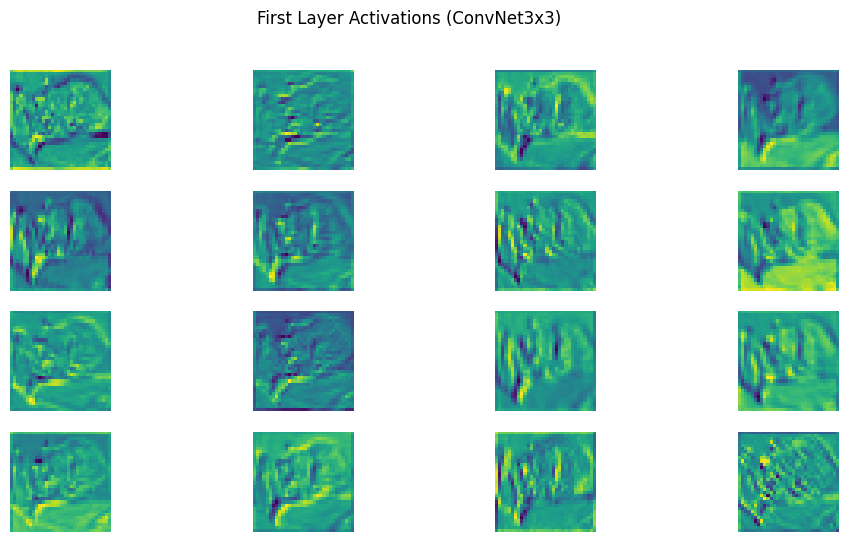

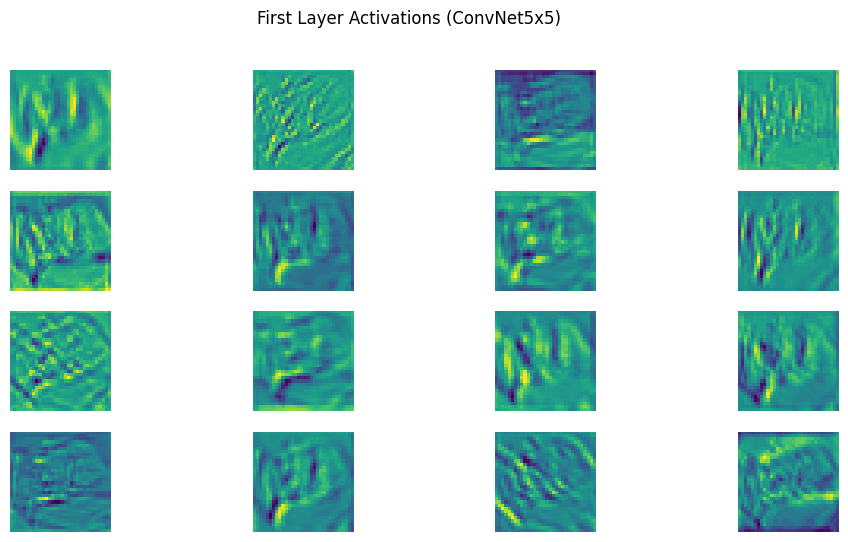

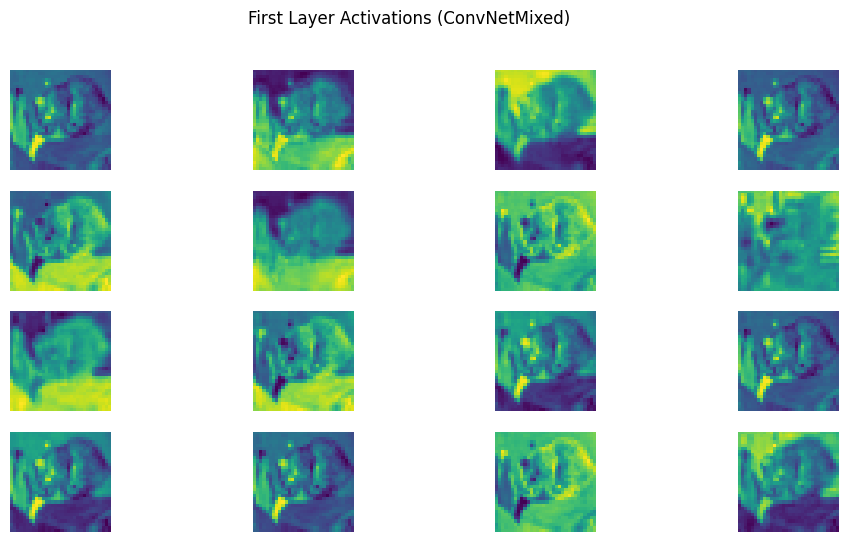

In [ ]:
def visualize_activations(model, sample):
    model.eval()
    first_conv = next(module for module in model.modules()
                     if isinstance(module, nn.Conv2d))

    with torch.no_grad():
        activations = first_conv(sample.unsqueeze(0).to(device))

    # Нормализация для визуализации
    activations = activations.squeeze().cpu().numpy()
    activations = (activations - activations.min()) / (activations.max() - activations.min())

    # Отображение первых 16 фильтров
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"First Layer Activations ({model.__class__.__name__})")
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(activations[i], cmap='viridis')
        plt.axis('off')
    plt.show()

# Визуализация для случайного изображения
sample = test_dataset_CIFAR[0][0]
for name, model in models.items():
    visualize_activations(model, sample)

2.2 Влияние глубины CNN
```
# Исследуйте влияние глубины CNN:
# - Неглубокая CNN (2 conv слоя)
# - Средняя CNN (4 conv слоя)
# - Глубокая CNN (6+ conv слоев)
# - CNN с Residual связями
#
# Для каждого варианта:
# - Сравните точность и время обучения
# - Проанализируйте vanishing/exploding gradients
# - Исследуйте эффективность Residual связей
# - Визуализируйте feature maps
```



In [6]:
class ShallowCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [7]:
class MediumCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, 3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.relu(self.bn3(self.conv3(x)))
        x = torch.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [8]:
class DeepCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.relu(self.bn3(self.conv3(x)))
        x = torch.relu(self.bn4(self.conv4(x)))
        x = torch.relu(self.bn5(self.conv5(x)))
        x = torch.relu(self.bn6(self.conv6(x)))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [9]:
class ResBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, 3, stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_ch)
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_ch)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_ch != out_ch:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 1, stride),
                nn.BatchNorm2d(out_ch))

    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return torch.relu(out)

class ResCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.block1 = ResBlock(64, 64)
        self.block2 = ResBlock(64, 128, 2)
        self.block3 = ResBlock(128, 256, 2)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [10]:
# 4. Функция обучения с анализом градиентов
def train_model(model, name):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    train_losses = []
    test_accs = []
    grad_means = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        grad_norms = []

        for x, y in tqdm(train_loader_CIFAR, desc=f'{name} Epoch {epoch+1}'):
            x, y = x.to(device), y.to(device)

            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()

            # Анализ градиентов
            grad_norm = 0
            for p in model.parameters():
                if p.grad is not None:
                    grad_norm += p.grad.norm().item()
            grad_norms.append(grad_norm)

            optimizer.step()
            epoch_loss += loss.item()

        # Среднее значение градиентов
        grad_means.append(np.mean(grad_norms))
        train_losses.append(epoch_loss/len(train_loader_CIFAR))

        # Валидация
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for x, y in train_loader_CIFAR:
                x, y = x.to(device), y.to(device)
                outputs = model(x)
                _, predicted = torch.max(outputs.data, 1)
                total += y.size(0)
                correct += (predicted == y).sum().item()

        test_acc = 100 * correct / total
        test_accs.append(test_acc)
        print(f'Epoch {epoch+1}: Loss: {train_losses[-1]:.4f}, Acc: {test_acc:.2f}%, Grad: {grad_means[-1]:.4f}')

    return {
        'name': name,
        'train_losses': train_losses,
        'test_accs': test_accs,
        'grad_means': grad_means
    }

# 5. Запуск обучения для всех моделей
models = {
    'ShallowCNN': ShallowCNN(),
    'MediumCNN': MediumCNN(),
    'DeepCNN': DeepCNN(),
    'ResCNN': ResCNN()
}

results = []
for name, model in models.items():
    print(f"\n=== Training {name} ===")
    result = train_model(model, name)
    results.append(result)


=== Training ShallowCNN ===


ShallowCNN Epoch 1: 100%|██████████| 196/196 [00:26<00:00,  7.31it/s]


Epoch 1: Loss: 1.8329, Acc: 37.64%, Grad: 1.5564


ShallowCNN Epoch 2: 100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


Epoch 2: Loss: 1.6037, Acc: 40.32%, Grad: 3.2190


ShallowCNN Epoch 3: 100%|██████████| 196/196 [00:23<00:00,  8.36it/s]


Epoch 3: Loss: 1.5087, Acc: 44.74%, Grad: 3.9570


ShallowCNN Epoch 4: 100%|██████████| 196/196 [00:23<00:00,  8.32it/s]


Epoch 4: Loss: 1.4467, Acc: 45.52%, Grad: 4.3228


ShallowCNN Epoch 5: 100%|██████████| 196/196 [00:25<00:00,  7.83it/s]


Epoch 5: Loss: 1.4045, Acc: 50.83%, Grad: 5.1070


ShallowCNN Epoch 6: 100%|██████████| 196/196 [00:24<00:00,  7.86it/s]


Epoch 6: Loss: 1.3703, Acc: 51.48%, Grad: 5.2449


ShallowCNN Epoch 7: 100%|██████████| 196/196 [00:25<00:00,  7.82it/s]


Epoch 7: Loss: 1.3405, Acc: 50.13%, Grad: 5.3782


ShallowCNN Epoch 8: 100%|██████████| 196/196 [00:24<00:00,  7.96it/s]


Epoch 8: Loss: 1.3189, Acc: 52.50%, Grad: 5.5778


ShallowCNN Epoch 9: 100%|██████████| 196/196 [00:24<00:00,  8.02it/s]


Epoch 9: Loss: 1.3006, Acc: 51.25%, Grad: 5.4706


ShallowCNN Epoch 10: 100%|██████████| 196/196 [00:24<00:00,  7.85it/s]


Epoch 10: Loss: 1.2898, Acc: 51.58%, Grad: 5.8640

=== Training MediumCNN ===


MediumCNN Epoch 1: 100%|██████████| 196/196 [00:36<00:00,  5.40it/s]


Epoch 1: Loss: 1.4660, Acc: 49.27%, Grad: 4.2313


MediumCNN Epoch 2: 100%|██████████| 196/196 [00:31<00:00,  6.23it/s]


Epoch 2: Loss: 1.1319, Acc: 56.42%, Grad: 5.1471


MediumCNN Epoch 3: 100%|██████████| 196/196 [00:32<00:00,  6.04it/s]


Epoch 3: Loss: 1.0025, Acc: 50.06%, Grad: 5.4810


MediumCNN Epoch 4: 100%|██████████| 196/196 [00:31<00:00,  6.18it/s]


Epoch 4: Loss: 0.9039, Acc: 64.44%, Grad: 5.3045


MediumCNN Epoch 5: 100%|██████████| 196/196 [00:30<00:00,  6.33it/s]


Epoch 5: Loss: 0.8293, Acc: 65.90%, Grad: 5.2781


MediumCNN Epoch 6: 100%|██████████| 196/196 [00:31<00:00,  6.24it/s]


Epoch 6: Loss: 0.7661, Acc: 70.56%, Grad: 5.0070


MediumCNN Epoch 7: 100%|██████████| 196/196 [00:31<00:00,  6.30it/s]


Epoch 7: Loss: 0.7163, Acc: 69.84%, Grad: 4.9234


MediumCNN Epoch 8: 100%|██████████| 196/196 [00:33<00:00,  5.86it/s]


Epoch 8: Loss: 0.6800, Acc: 73.62%, Grad: 5.1065


MediumCNN Epoch 9: 100%|██████████| 196/196 [00:31<00:00,  6.17it/s]


Epoch 9: Loss: 0.6435, Acc: 72.78%, Grad: 4.8483


MediumCNN Epoch 10: 100%|██████████| 196/196 [00:31<00:00,  6.14it/s]


Epoch 10: Loss: 0.6136, Acc: 75.09%, Grad: 4.8830

=== Training DeepCNN ===


DeepCNN Epoch 1: 100%|██████████| 196/196 [01:28<00:00,  2.22it/s]


Epoch 1: Loss: 1.5290, Acc: 50.61%, Grad: 4.2071


DeepCNN Epoch 2: 100%|██████████| 196/196 [01:12<00:00,  2.72it/s]


Epoch 2: Loss: 1.1450, Acc: 54.30%, Grad: 5.4198


DeepCNN Epoch 3: 100%|██████████| 196/196 [01:11<00:00,  2.73it/s]


Epoch 3: Loss: 0.9693, Acc: 63.08%, Grad: 5.6741


DeepCNN Epoch 4: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]


Epoch 4: Loss: 0.8518, Acc: 60.62%, Grad: 5.5327


DeepCNN Epoch 5: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]


Epoch 5: Loss: 0.7641, Acc: 63.38%, Grad: 5.4065


DeepCNN Epoch 6: 100%|██████████| 196/196 [01:11<00:00,  2.73it/s]


Epoch 6: Loss: 0.7015, Acc: 75.50%, Grad: 5.3386


DeepCNN Epoch 7: 100%|██████████| 196/196 [01:11<00:00,  2.76it/s]


Epoch 7: Loss: 0.6368, Acc: 73.08%, Grad: 5.0562


DeepCNN Epoch 8: 100%|██████████| 196/196 [01:10<00:00,  2.77it/s]


Epoch 8: Loss: 0.5942, Acc: 75.52%, Grad: 5.1997


DeepCNN Epoch 9: 100%|██████████| 196/196 [01:10<00:00,  2.80it/s]


Epoch 9: Loss: 0.5550, Acc: 74.84%, Grad: 4.9699


DeepCNN Epoch 10: 100%|██████████| 196/196 [01:09<00:00,  2.82it/s]


Epoch 10: Loss: 0.5225, Acc: 80.95%, Grad: 4.9415

=== Training ResCNN ===


ResCNN Epoch 1: 100%|██████████| 196/196 [00:37<00:00,  5.22it/s]


Epoch 1: Loss: 1.4453, Acc: 52.50%, Grad: 5.9038


ResCNN Epoch 2: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]


Epoch 2: Loss: 1.0315, Acc: 58.40%, Grad: 7.0593


ResCNN Epoch 3: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]


Epoch 3: Loss: 0.8736, Acc: 67.18%, Grad: 6.9023


ResCNN Epoch 4: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]


Epoch 4: Loss: 0.7496, Acc: 71.60%, Grad: 6.5760


ResCNN Epoch 5: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]


Epoch 5: Loss: 0.6630, Acc: 76.47%, Grad: 6.4534


ResCNN Epoch 6: 100%|██████████| 196/196 [00:35<00:00,  5.45it/s]


Epoch 6: Loss: 0.5964, Acc: 72.66%, Grad: 6.2580


ResCNN Epoch 7: 100%|██████████| 196/196 [00:34<00:00,  5.64it/s]


Epoch 7: Loss: 0.5402, Acc: 75.50%, Grad: 5.9822


ResCNN Epoch 8: 100%|██████████| 196/196 [00:34<00:00,  5.64it/s]


Epoch 8: Loss: 0.4941, Acc: 78.22%, Grad: 5.7955


ResCNN Epoch 9: 100%|██████████| 196/196 [00:35<00:00,  5.59it/s]


Epoch 9: Loss: 0.4651, Acc: 80.34%, Grad: 5.7224


ResCNN Epoch 10: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]


Epoch 10: Loss: 0.4340, Acc: 83.92%, Grad: 5.5577



Feature maps для ShallowCNN:


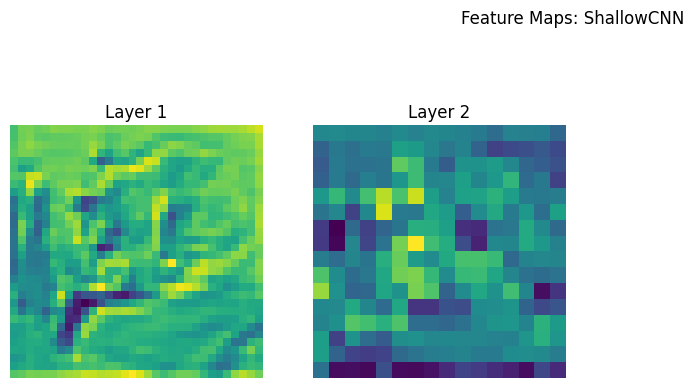


Feature maps для MediumCNN:


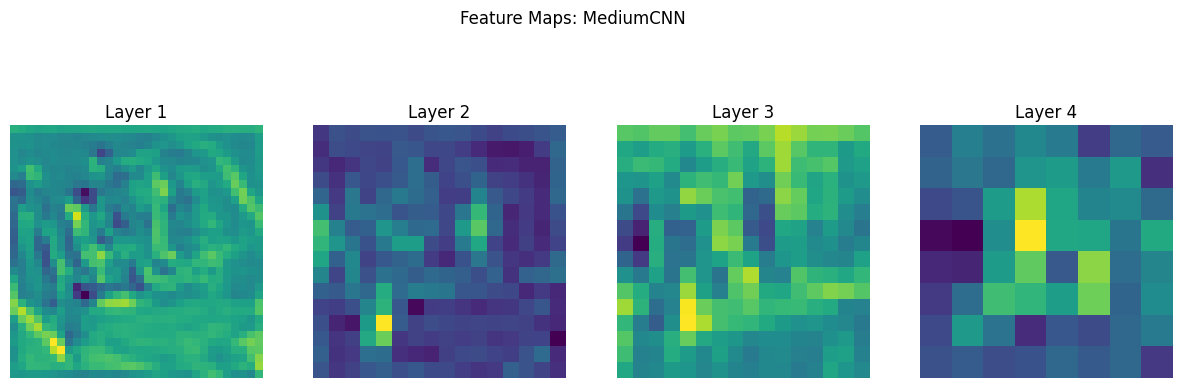


Feature maps для DeepCNN:


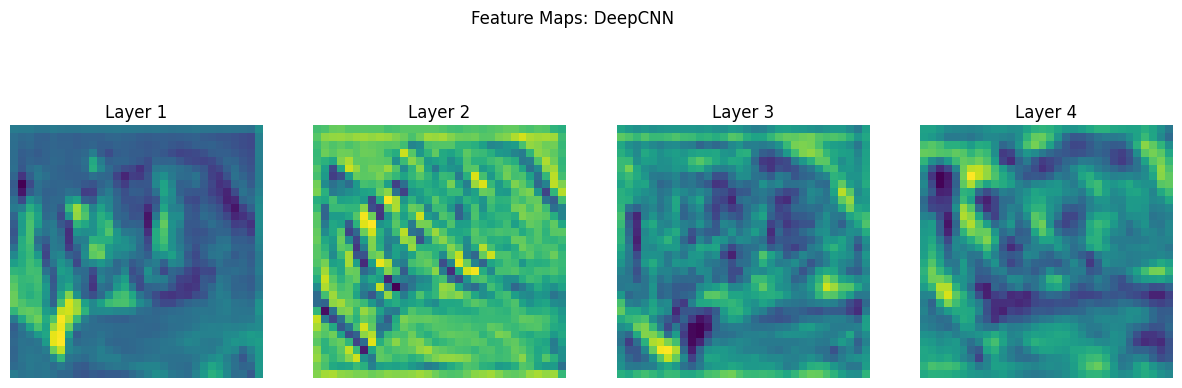


Feature maps для ResCNN:


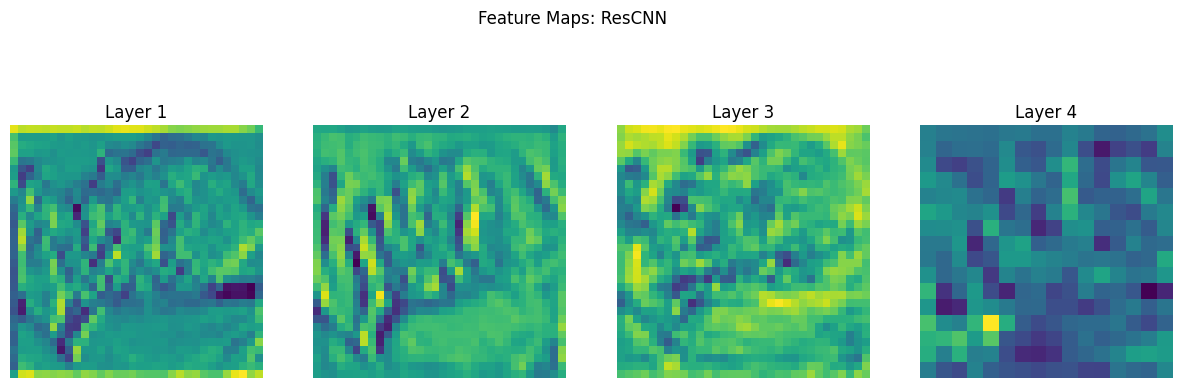


Итоговые результаты:
Модель               Точность   Сред. градиент 
------------------------------------------------------------
ShallowCNN           52.50     % 4.5698         
MediumCNN            75.09     % 5.0210         
DeepCNN              80.95     % 5.1746         
ResCNN               83.92     % 6.2211         


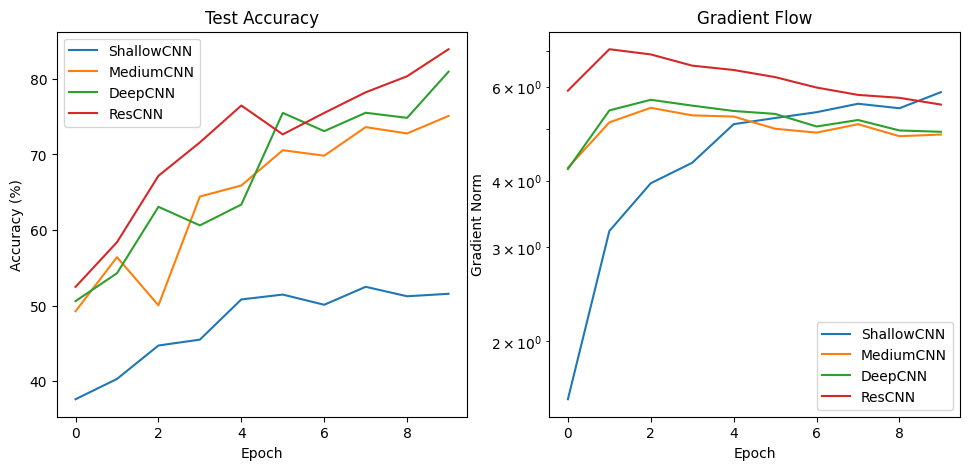

In [13]:
def visualize_features(model, sample):
    model.eval()
    activations = []

    def hook(module, input, output):
        activations.append(output.cpu())

    hooks = []
    for name, layer in model.named_modules():
        if isinstance(layer, nn.Conv2d):
            hooks.append(layer.register_forward_hook(hook))

    with torch.no_grad():
        model(sample.unsqueeze(0).to(device))

    for h in hooks:
        h.remove()

    plt.figure(figsize=(15, 5))
    for i, act in enumerate(activations[:4]):
        plt.subplot(1, 4, i+1)
        plt.imshow(act[0, 0].numpy(), cmap='viridis')
        plt.title(f'Layer {i+1}')
        plt.axis('off')
    plt.suptitle(f'Feature Maps: {model.__class__.__name__}')
    plt.show()

sample = test_dataset_CIFAR[0][0]
for name, model in models.items():
    print(f"\nFeature maps для {name}:")
    visualize_features(model, sample)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
for res in results:
    plt.plot(res['test_accs'], label=res['name'])
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 3, 2)
for res in results:
    plt.plot(res['grad_means'], label=res['name'])
plt.title('Gradient Flow')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.yscale('log')
plt.legend()

print("\nИтоговые результаты:")
print(f"{'Модель':<20} {'Точность':<10} {'Сред. градиент':<15}")
print("-"*60)
for res in results:
    print(f"{res['name']:<20} {max(res['test_accs']):<10.2f}% {np.mean(res['grad_means']):<15.4f}")